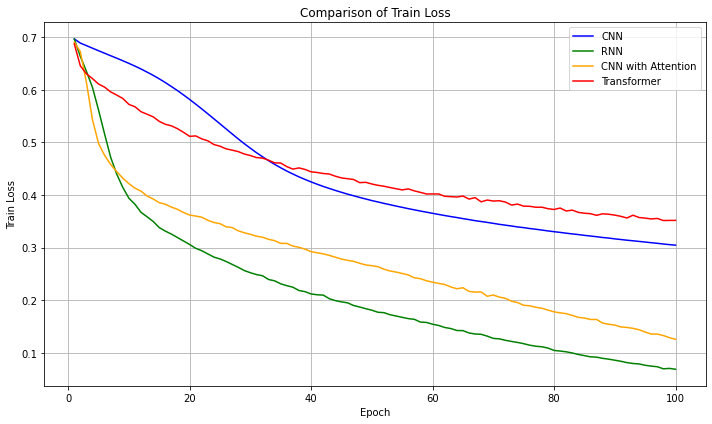

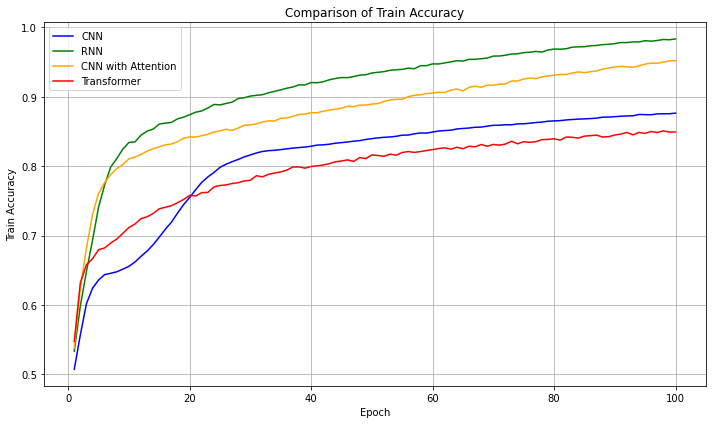

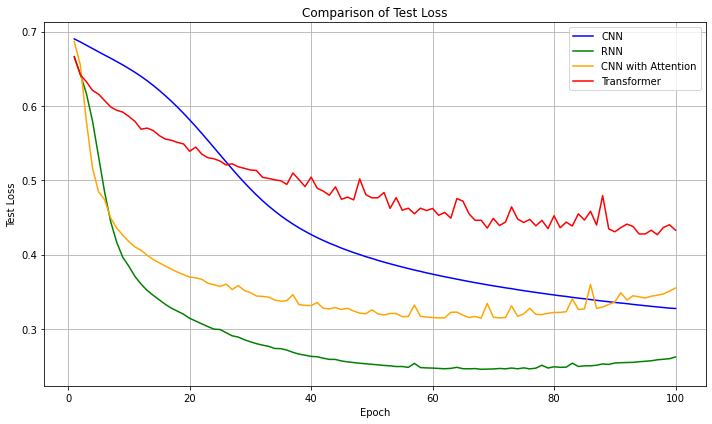

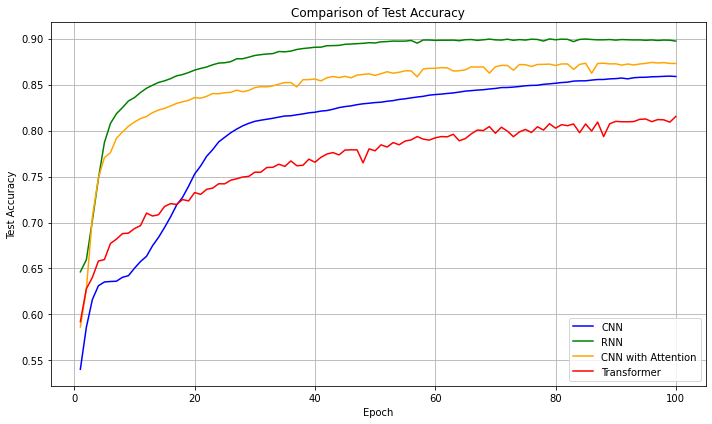

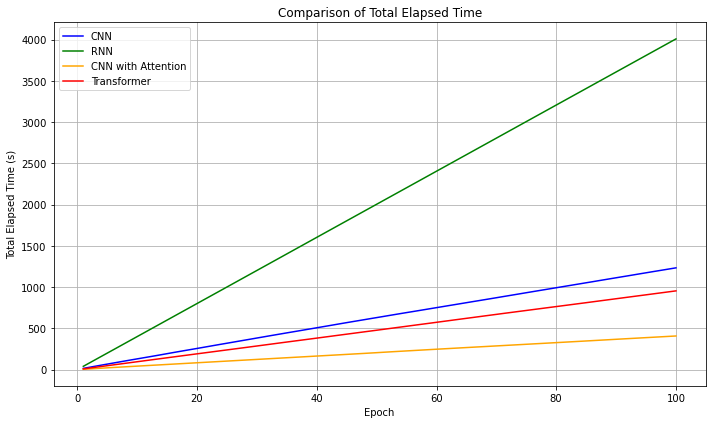

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_comparisons(csv_files, model_names):
    """
    Plots comparisons of train loss, train accuracy, test loss, test accuracy, 
    and total elapsed time across multiple models.

    Args:
        csv_files (list): List of CSV file paths, each containing metrics of a model.
        model_names (list): List of model names corresponding to the CSV files.
    """
    metrics = ["Train Loss", "Train Accuracy", "Test Loss", "Test Accuracy"]
    colors = ['blue', 'green', 'orange', 'red', 'purple']
    
    # Plot performance metrics
    for metric in metrics:
        plt.figure(figsize=(10, 6))
        for idx, (csv_file, model_name) in enumerate(zip(csv_files, model_names)):
            data = pd.read_csv(csv_file)
            epochs = data["Epoch"].to_numpy()
            if metric not in data.columns:
                print(f"'{metric}' not found in {csv_file}. Skipping this metric.")
                continue
            values = data[metric].to_numpy()
            plt.plot(epochs, values, label=model_name, color=colors[idx % len(colors)])
        
        plt.title(f"Comparison of {metric}")
        plt.xlabel("Epoch")
        plt.ylabel(metric)
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

    # Plot total elapsed time comparison
    plt.figure(figsize=(10, 6))
    for idx, (csv_file, model_name) in enumerate(zip(csv_files, model_names)):
        data = pd.read_csv(csv_file)
        epochs = data["Epoch"].to_numpy()
        if "Total Elapsed Time (s)" not in data.columns:
            print(f"'Total Elapsed Time (s)' not found in {csv_file}. Skipping.")
            continue
        elapsed_time = data["Total Elapsed Time (s)"].to_numpy()
        plt.plot(epochs, elapsed_time, label=model_name, color=colors[idx % len(colors)])
    
    plt.title("Comparison of Total Elapsed Time")
    plt.xlabel("Epoch")
    plt.ylabel("Total Elapsed Time (s)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# Example usage:
csv_files = [
    "cnn_metrics.csv", 
    "rnn_metrics.csv", 
    "cnn_attention_metrics.csv", 
    "transformer_metrics.csv"
]  # Replace with your file paths

model_names = ["CNN", "RNN", "CNN with Attention", "Transformer"]  # Replace with your model names

plot_comparisons(csv_files, model_names)
